In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Flight_train.xlsx')
df1=pd.read_excel('Flight_Test.xlsx')

In [4]:

df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
def dur(e):
    if(len(e.split())==2):
        n,k=e.split()
        n=n.replace('h','')
        k=k.replace('m','')
        t=int(n)*60+int(k)
        return t
    elif('h' in e):
        e=e.replace('h','')
        return int(e)*60
    else:
        e=e.replace('m','')
        return int(e)

       
for i in range(len(df['Duration'])):
    m=dur(df['Duration'][i])
    df['Duration'][i]=m
for i in range(len(df1['Duration'])):
    m=dur(df1['Duration'][i])
    df1['Duration'][i]=m
           

E:\Python_Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [7]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df1['Dep_Time']=pd.to_datetime(df1['Dep_Time'])

In [8]:
df['ME']=df['Dep_Time'].apply(lambda x:x.hour)
df1['ME']=df1['Dep_Time'].apply(lambda x:x.hour)

In [9]:
df['ME1']=df['ME'].apply(lambda x:'Morning' if x>12 else 'Evening')
df1['ME1']=df1['ME'].apply(lambda x:'Morning' if x>12 else 'Evening')


In [10]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])

In [11]:
df['Month']=df['Date_of_Journey'].apply(lambda x:x.month)
df['Day of Week']=df['Date_of_Journey'].apply(lambda x:x.dayofweek)
df['Day']=df['Date_of_Journey'].apply(lambda x:x.day)
df1['Month']=df1['Date_of_Journey'].apply(lambda x:x.month)
df1['Day of Week']=df1['Date_of_Journey'].apply(lambda x:x.dayofweek)
df1['Day']=df1['Date_of_Journey'].apply(lambda x:x.day)

In [42]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,ME,ME1,Month,Day of Week,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-09-11 22:20:00,01:10 22 Mar,170,non-stop,No info,3897,22,Morning,3,6,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-09-11 05:50:00,13:15,445,2 stops,No info,7662,5,Evening,1,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-09-11 09:25:00,04:25 10 Jun,1140,2 stops,No info,13882,9,Evening,9,4,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-09-11 18:05:00,23:30,325,1 stop,No info,6218,18,Morning,12,3,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-09-11 16:50:00,21:35,285,1 stop,No info,13302,16,Morning,1,3,3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  ME               10682 non-null  int64         
 12  ME1              10682 non-null  object        
 13  Month            10682 non-null  int64         
 14  Day of Week      10682 non-null  int64

E:\Python_Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
df['Duration']=df['Duration'].astype('int64')
df1['Duration']=df1['Duration'].astype('int64')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  int64         
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  ME               10682 non-null  int64         
 12  ME1              10682 non-null  object        
 13  Month            10682 non-null  int64         
 14  Day of Week      10682 non-null  int64

In [13]:
df['Total_st']=df['Total_Stops'].apply(lambda x: 0 if x == 'non-stop' else str(x).split()[0])
df1['Total_st']=df1['Total_Stops'].apply(lambda x: 0 if x == 'non-stop' else str(x).split()[0])

In [ ]:
df['Total_st']


In [14]:
df['Total_st']=df['Total_st'].apply(pd.to_numeric)
df1['Total_st']=df1['Total_st'].apply(pd.to_numeric)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  int64         
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  ME               10682 non-null  int64         
 12  ME1              10682 non-null  object        
 13  Month            10682 non-null  int64         
 14  Day of Week      10682 non-null  int64

In [15]:
df_dummy=pd.get_dummies(df[['Airline','ME1']])
df=pd.concat([df,df_dummy],axis=1)
df_dummy=pd.get_dummies(df1[['Airline','ME1']])
df1=pd.concat([df1,df_dummy],axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Airline                                    10682 non-null  object        
 1   Date_of_Journey                            10682 non-null  datetime64[ns]
 2   Source                                     10682 non-null  object        
 3   Destination                                10682 non-null  object        
 4   Route                                      10682 non-null  object        
 5   Dep_Time                                   10682 non-null  datetime64[ns]
 6   Arrival_Time                               10682 non-null  object        
 7   Duration                                   10682 non-null  int64         
 8   Total_Stops                                10682 non-null  object        
 9   Additional_Info  

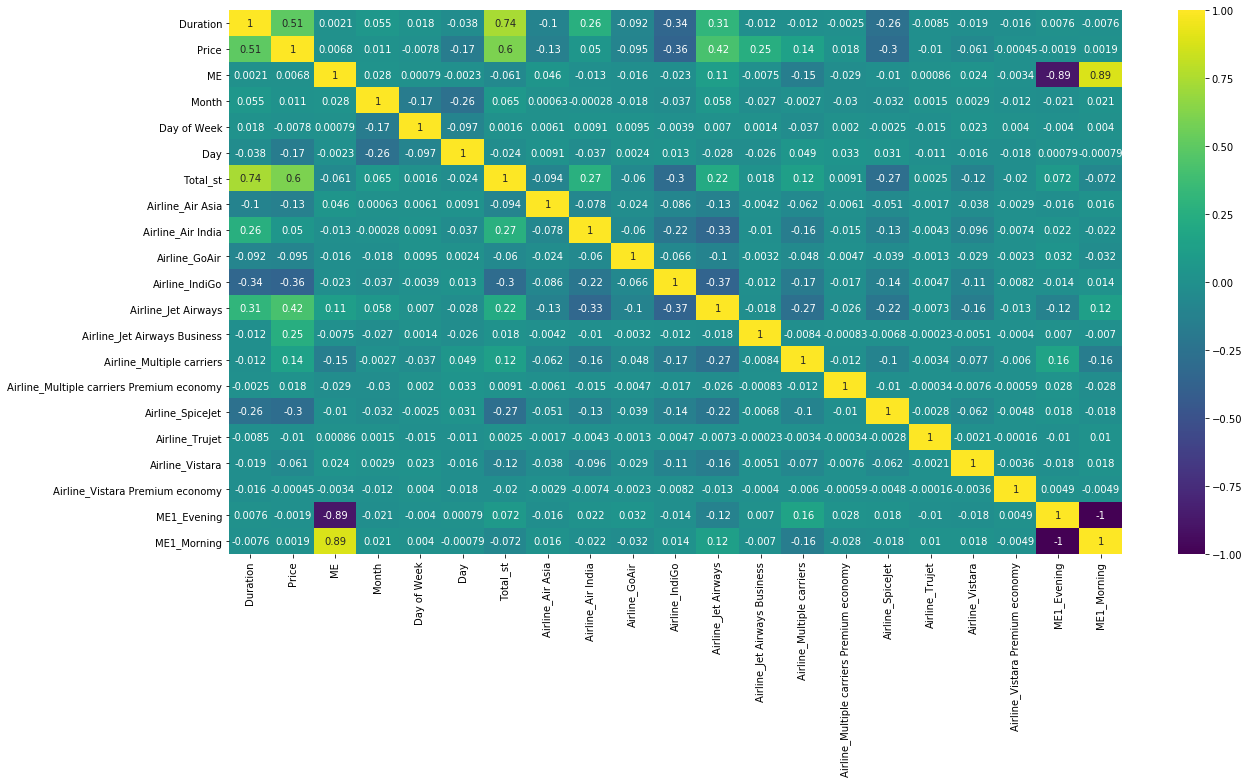

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

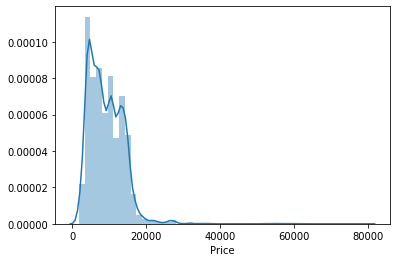

In [17]:
sns.distplot(df['Price'])

In [ ]:
sns.scatterplot(x='Duration',y='Price',data=df)

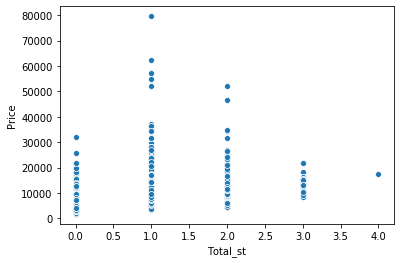

In [18]:
sns.scatterplot(x='Total_st',y='Price',data=df)

In [ ]:
sns.boxplot(x='Total_st',y='Price',data=df,palette='coolwarm')

In [55]:
df2=df.drop(['Price','Date_of_Journey','Dep_Time','ME','ME1','Airline_Trujet'],axis=1)
X_train=df2.select_dtypes(exclude='object')
y_train=df['Price']
df2=df1.drop(['Date_of_Journey','Dep_Time','ME','ME1'],axis=1)
X_test=df2.select_dtypes(exclude='object')




In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

scaler.fit(X_test)
X_test=scaler.transform(X_test)

#sc_y = StandardScaler()



In [58]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Month                                      10682 non-null  int64
 2   Day of Week                                10682 non-null  int64
 3   Day                                        10682 non-null  int64
 4   Total_st                                   10682 non-null  int64
 5   Airline_Air Asia                           10682 non-null  uint8
 6   Airline_Air India                          10682 non-null  uint8
 7   Airline_GoAir                              10682 non-null  uint8
 8   Airline_IndiGo                             10682 non-null  uint8
 9   Airline_Jet Airways                        10682 non-null  uint8
 10  Airline_Jet Airways Business               106

In [59]:
pred=lm.predict(X_test)

In [60]:
pred

array([12319.33086328,  7145.09725539, 11454.51035287, ...,
       12819.53285176,  9787.64062245,  9857.35912193])

In [53]:
pred

array([12198.50465611,  7124.70327017, 11401.50323972, ...,
       12683.04795897,  9821.33289306, 10393.60007615])

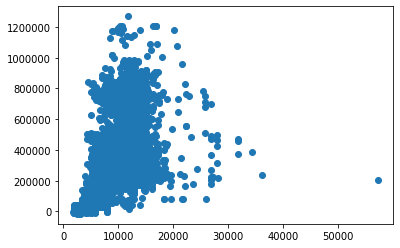

In [71]:
plt.scatter(y_test,pred)

In [42]:
print(pred)

[12173.69103847  7115.73219302 11347.29502888 ... 12668.15978839
  9786.59382836 10360.96062526]


In [61]:
pd.DataFrame(pred, columns = ['Price']).to_excel("E:\Final_Pred3.xlsx", index = False)

In [73]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test,pred)
print('R Squared(Accuracy)', metrics.r2_score(y_test, pred))

R Squared(Accuracy) -8170.355804564741


In [62]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

2913.6122191860222